In [1]:
import warnings
warnings.filterwarnings('ignore')

from src.prepare import telco_eda_prep

from scipy.stats import chi2_contingency

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = telco_eda_prep()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gender                7043 non-null   object  
 1   senior_citizen        7043 non-null   int64   
 2   partner               7043 non-null   object  
 3   dependents            7043 non-null   object  
 4   tenure                7043 non-null   int64   
 5   phone_service         7043 non-null   object  
 6   multiple_lines        7043 non-null   object  
 7   internet_service      7043 non-null   object  
 8   online_security       7043 non-null   object  
 9   online_backup         7043 non-null   object  
 10  device_protection     7043 non-null   object  
 11  tech_support          7043 non-null   object  
 12  streaming_tv          7043 non-null   object  
 13  streaming_movies      7043 non-null   object  
 14  contract              7043 non-null   object  
 15  pape

In [3]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,monthly_charges_bins
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,Yes,No,1-year,Yes,check,65.6,593.30,No,"(58.83, 70.35]"
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,No,Yes,month-to-month,No,check,59.9,542.40,No,"(58.83, 70.35]"
2,Male,0,No,No,4,Yes,No,fiber optic,No,No,...,No,No,No,month-to-month,Yes,e-check,73.9,280.85,Yes,"(70.35, 79.1]"
3,Male,1,Yes,No,13,Yes,No,fiber optic,No,Yes,...,No,Yes,Yes,month-to-month,Yes,e-check,98.0,1237.85,Yes,"(94.25, 102.6]"
4,Female,1,Yes,No,3,Yes,No,fiber optic,No,No,...,Yes,Yes,No,month-to-month,Yes,check,83.9,267.40,Yes,"(79.1, 85.5]"


## 27% of Telco customers churned

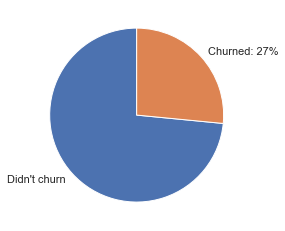

In [4]:
sns.set(style="darkgrid")
plt.pie(df.churn.value_counts(), labels=["Didn't churn","Churned: 27%"], startangle=90);

### $χ^2$ contingency table hypothesis testing

### $H_0$ : churn is independent of contract type

In [5]:
observed = pd.crosstab(df.churn, df.contract)
chi2, p, degf, expected = chi2_contingency(observed)
bonf = observed.shape[0]*observed.shape[1]

print('Observed\n')
print(observed)
print('---\nExpected\n')
print(pd.DataFrame(np.round(expected), index=['No', 'Yes'],
                   columns=['1-year',  '2-year',  'month-to-month']))
print('---\n')
print(f'Bonferroni correction = {bonf}')
print(f'chi^2 = {chi2:.3f}')
print(f'p     = {bonf*p:.3f}')

Observed

contract  1-year  2-year  month-to-month
churn                                   
No          1307    1647            2220
Yes          166      48            1655
---
Expected

     1-year  2-year  month-to-month
No   1082.0  1245.0          2847.0
Yes   391.0   450.0          1028.0
---

Bonferroni correction = 6
chi^2 = 1184.597
p     = 0.000


### $H_0$ : churn is independent of payment method

In [6]:
observed = pd.crosstab(df.churn, df.payment_method)
chi2, p, degf, expected = chi2_contingency(observed)
bonf = observed.shape[0]*observed.shape[1]

print('Observed\n')
print(observed)
print('---\nExpected\n')
print(pd.DataFrame(np.round(expected), index=['No', 'Yes'],
                   columns=['transfer',  'check',  'credit', 'e-check']))
print('---\n')
print(f'Bonferroni correction = {bonf}')
print(f'chi^2 = {chi2:.3f}')
print(f'p     = {bonf*p:.3f}')

Observed

payment_method  bank transfer  check  credit card  e-check
churn                                                     
No                       1286   1304         1290     1294
Yes                       258    308          232     1071
---
Expected

     transfer   check  credit  e-check
No     1134.0  1184.0  1118.0   1737.0
Yes     410.0   428.0   404.0    628.0
---

Bonferroni correction = 8
chi^2 = 648.142
p     = 0.000


### $H_0$ : churn is independent of everything

In [26]:
insignificant_variables = []

for col in df.columns[:-4]:
    observed = pd.crosstab(df.churn, df[col])
    chi2, p, degf, expected = chi2_contingency(observed)
    bonf = observed.shape[0]*observed.shape[1]
    alpha = .05
    
    if bonf*p > alpha: insignificant_variables.append(col)
    
    print('Observed\n')
    print(observed)
    print('---\nExpected\n')
    print(pd.DataFrame(np.round(expected), index=['No', 'Yes']))
    print('---\n')
    print(f'Bonferroni correction = {bonf}')
    print(f'chi^2 = {chi2:.3f}')
    print(f'p     = {np.min([bonf*p, .9999]):.4f}\n\n')

Observed

gender  Female  Male
churn               
No        2549  2625
Yes        939   930
---
Expected

          0       1
No   2562.0  2612.0
Yes   926.0   943.0
---

Bonferroni correction = 4
chi^2 = 0.484
p     = 0.9999


Observed

senior_citizen     0    1
churn                    
No              4508  666
Yes             1393  476
---
Expected

          0      1
No   4335.0  839.0
Yes  1566.0  303.0
---

Bonferroni correction = 4
chi^2 = 159.426
p     = 0.0000


Observed

partner    No   Yes
churn              
No       2441  2733
Yes      1200   669
---
Expected

          0       1
No   2675.0  2499.0
Yes   966.0   903.0
---

Bonferroni correction = 4
chi^2 = 158.733
p     = 0.0000


Observed

dependents    No   Yes
churn                 
No          3390  1784
Yes         1543   326
---
Expected

          0       1
No   3624.0  1550.0
Yes  1309.0   560.0
---

Bonferroni correction = 4
chi^2 = 189.129
p     = 0.0000


Observed

tenure  0    1    2    3   4   5   6   7   

In [27]:
df.columns[:-4]

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method'],
      dtype='object')

In [28]:
insignificant_variables

['gender', 'phone_service']

In [ ]:
observed = pd.crosstab(df.churn, df.streaming_movies)
chi2, p, degf, expected = chi2_contingency(observed)
bonf = observed.shape[0]*observed.shape[1]

print('Observed\n')
print(observed)
print('---\nExpected\n')
print(pd.DataFrame(np.round(expected), index=['No', 'Yes'],
                   columns=['transfer',  'check']))
print('---\n')
print(f'Bonferroni correction = {bonf}')
print(f'chi^2 = {chi2:.3f}')
print(f'p     = {bonf*p:.11f}')

In [ ]:
f=plt.subplots(figsize=(4,6))
ax=sns.countplot(data=df, x='internet_service', hue='churn', order=['fiber optic','DSL','none'])
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title("Churn by Internet Service");

In [ ]:
f=plt.subplots(figsize=(4,6))
ax=sns.countplot(data=df, x='contract', hue='churn', order=['month-to-month','1-year','2-year'])
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title("Churn by Contract Type");

In [ ]:
f=plt.subplots(figsize=(5,6))
ax=sns.countplot(data=df, x='payment_method', hue='churn', order=['e-check','check','bank transfer', 'credit card'])
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title("Churn by Payment Method");

In [ ]:
f=plt.subplots(figsize=(5,6))
ax=sns.countplot(data=df, x='dependents', hue='churn')
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title("Churn by Dependents");

In [ ]:
f=plt.subplots(figsize=(12,6))
ax=sns.countplot(data=df, x='monthly_charges_bins', hue='churn')
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title("Churn by Monthly Charges");